In [1]:
!git clone https://github.com/Amine-sal/track.git

Cloning into 'track'...
Updating files:  15% (2334/15517)
Updating files:  16% (2483/15517)
Updating files:  17% (2638/15517)
Updating files:  18% (2794/15517)
Updating files:  19% (2949/15517)
Updating files:  20% (3104/15517)
Updating files:  21% (3259/15517)
Updating files:  22% (3414/15517)
Updating files:  23% (3569/15517)
Updating files:  24% (3725/15517)
Updating files:  25% (3880/15517)
Updating files:  26% (4035/15517)
Updating files:  27% (4190/15517)
Updating files:  28% (4345/15517)
Updating files:  29% (4500/15517)
Updating files:  30% (4656/15517)
Updating files:  30% (4664/15517)
Updating files:  31% (4811/15517)
Updating files:  32% (4966/15517)
Updating files:  33% (5121/15517)
Updating files:  34% (5276/15517)
Updating files:  35% (5431/15517)
Updating files:  36% (5587/15517)
Updating files:  37% (5742/15517)
Updating files:  38% (5897/15517)
Updating files:  39% (6052/15517)
Updating files:  40% (6207/15517)
Updating files:  41% (6362/15517)
Updating files:  42% (65

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from imgaug import augmenters as iaa
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D , MaxPooling2D, Dropout, Flatten, Dense 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

Using TensorFlow backend.


In [3]:
datadir = 'track'
columns = ['center', 'left' , 'right', 'steering', 'throttle','reverse', 'speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\salaj\Desktop\Data\IMG\center_2020_03_27_20_36_34_831.jpg,C:\Users\salaj\Desktop\Data\IMG\left_2020_03_27_20_36_34_831.jpg,C:\Users\salaj\Desktop\Data\IMG\right_2020_03_27_20_36_34_831.jpg,0.0,0.0,0.0,0.000078
1,C:\Users\salaj\Desktop\Data\IMG\center_2020_03_27_20_36_34_933.jpg,C:\Users\salaj\Desktop\Data\IMG\left_2020_03_27_20_36_34_933.jpg,C:\Users\salaj\Desktop\Data\IMG\right_2020_03_27_20_36_34_933.jpg,0.0,0.0,0.0,0.000078
2,C:\Users\salaj\Desktop\Data\IMG\center_2020_03_27_20_36_35_034.jpg,C:\Users\salaj\Desktop\Data\IMG\left_2020_03_27_20_36_35_034.jpg,C:\Users\salaj\Desktop\Data\IMG\right_2020_03_27_20_36_35_034.jpg,0.0,0.0,0.0,0.000078
3,C:\Users\salaj\Desktop\Data\IMG\center_2020_03_27_20_36_35_135.jpg,C:\Users\salaj\Desktop\Data\IMG\left_2020_03_27_20_36_35_135.jpg,C:\Users\salaj\Desktop\Data\IMG\right_2020_03_27_20_36_35_135.jpg,0.0,0.0,0.0,0.000078
4,C:\Users\salaj\Desktop\Data\IMG\center_2020_03_27_20_36_35_237.jpg,C:\Users\salaj\Desktop\Data\IMG\left_2020_03_27_20_36_35_237.jpg,C:\Users\salaj\Desktop\Data\IMG\right_2020_03_27_20_36_35_237.jpg,0.0,0.0,0.0,0.000084


In [4]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right']= data['right'].apply(path_leaf)
data.head()


,center,left,right,steering,throttle,reverse,speed
0,center_2020_03_27_20_36_34_831.jpg,left_2020_03_27_20_36_34_831.jpg,right_2020_03_27_20_36_34_831.jpg,0.0,0.0,0.0,0.000078
1,center_2020_03_27_20_36_34_933.jpg,left_2020_03_27_20_36_34_933.jpg,right_2020_03_27_20_36_34_933.jpg,0.0,0.0,0.0,0.000078
2,center_2020_03_27_20_36_35_034.jpg,left_2020_03_27_20_36_35_034.jpg,right_2020_03_27_20_36_35_034.jpg,0.0,0.0,0.0,0.000078
3,center_2020_03_27_20_36_35_135.jpg,left_2020_03_27_20_36_35_135.jpg,right_2020_03_27_20_36_35_135.jpg,0.0,0.0,0.0,0.000078
4,center_2020_03_27_20_36_35_237.jpg,left_2020_03_27_20_36_35_237.jpg,right_2020_03_27_20_36_35_237.jpg,0.0,0.0,0.0,0.000084


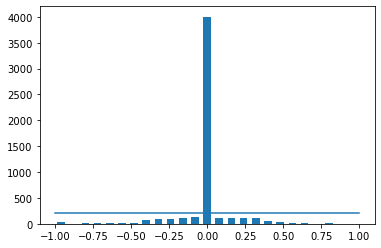

In [5]:
num_bins = 25
samples_per_bin = 200

hist, bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist,width = 0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin,samples_per_bin))


total data: 5172
removed: 3802
remaining: 1370


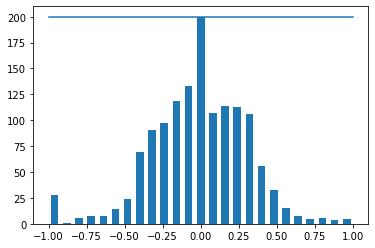

In [6]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
 
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))
 
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [7]:
print(type(data))
print(data.iloc[100])

def load_img_steering(datadir,df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0],indexed_data[1],indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steering = np.asarray(steering)
    return image_path, steering

image_path, steering = load_img_steering(datadir +'/IMG',data)
 

<class 'pandas.core.frame.DataFrame'>
center      center_2020_03_27_20_37_26_943.jpg
left          left_2020_03_27_20_37_26_943.jpg
right        right_2020_03_27_20_37_26_943.jpg
steering                            -0.0878517
throttle                                     1
reverse                                      0
speed                                  30.1883
Name: 514, dtype: object


In [8]:
X_train,X_valid,y_train,y_valid = train_test_split(image_path,steering, test_size = 0.2, random_state =6)
print('training_samples:{} \nValid Samples : {}'.format(len(X_train), len(X_valid)))


training_samples:1096 
Valid Samples : 274


Text(0.5, 1.0, 'validation_set')

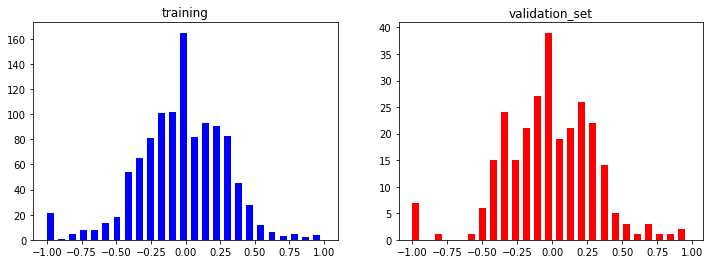

In [9]:
fig, axes = plt.subplots(1, 2,figsize = (12,4))
axes[0].hist(y_train, bins = num_bins, width = 0.05, color = 'blue')
axes[0].set_title('training')
axes[1].hist(y_valid, bins = num_bins, width = 0.05, color = 'red')
axes[1].set_title('validation_set')

In [10]:
def zoomed(image):
    zoom = iaa.Affine(scale =(1,1.3))
    image = zoom.augment_image(image)
    return image

Text(0.5, 1.0, 'zoomed_image')

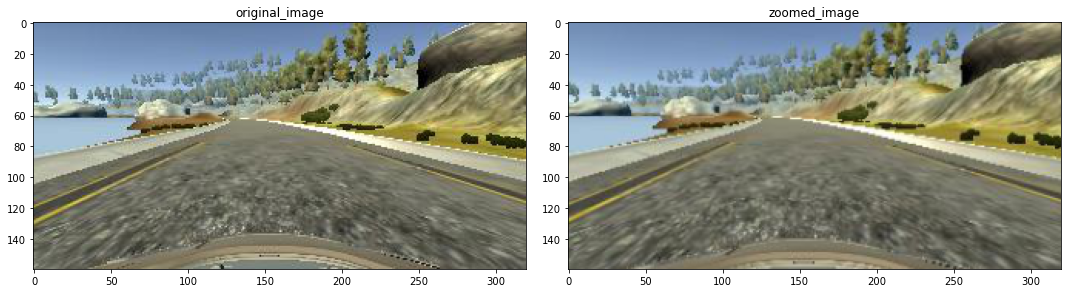

In [57]:
image = image_path[(random.randint(0,1000))]
original_image = mpimg.imread(image)
zoomed_image =zoomed(original_image)

fig,ax =plt.subplots(1,2, figsize=(15,20))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('original_image')
ax[1].imshow(zoomed_image)
ax[1].set_title('zoomed_image')


In [58]:
def pan(image):
    pan = iaa.Affine(translate_percent = {'x': (-0.1, 0.1) ,'y': (-0.1, 0.1) })
    image = pan.augment_image(image)
    return image


Text(0.5, 1.0, 'pan_image')

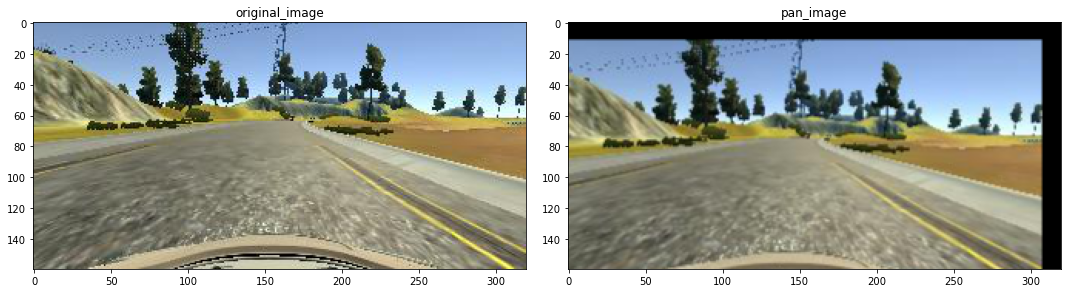

In [59]:
image = image_path[(random.randint(0,1000))]
original_image = mpimg.imread(image)
pan_image = pan(original_image)

fig,ax =plt.subplots(1,2, figsize=(15,20))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('original_image')
ax[1].imshow(pan_image)
ax[1].set_title('pan_image')

In [60]:
def img_random_brightness(image):
    brightness =  iaa.Multiply((0.2,1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'bright_image')

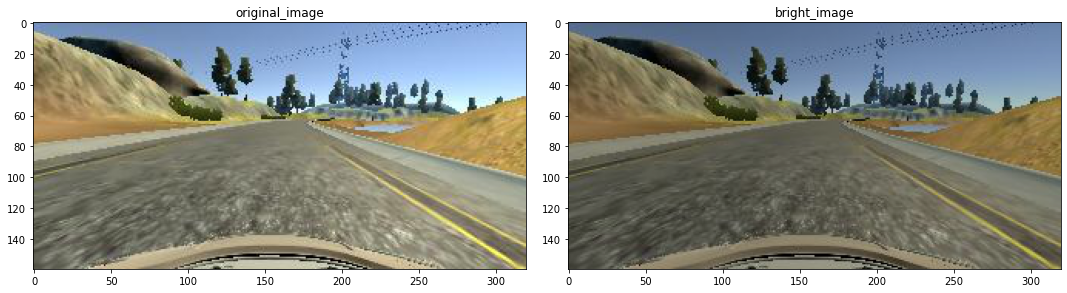

In [61]:
image = image_path[(random.randint(0,1000))]
original_image = mpimg.imread(image)
bright_image = img_random_brightness(original_image)

fig,ax =plt.subplots(1,2, figsize=(15,20))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('original_image')
ax[1].imshow(bright_image)
ax[1].set_title('bright_image')

In [62]:
def flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

Text(0.5, 1.0, 'fliped_imagefliped_steering_angle:-0.0')

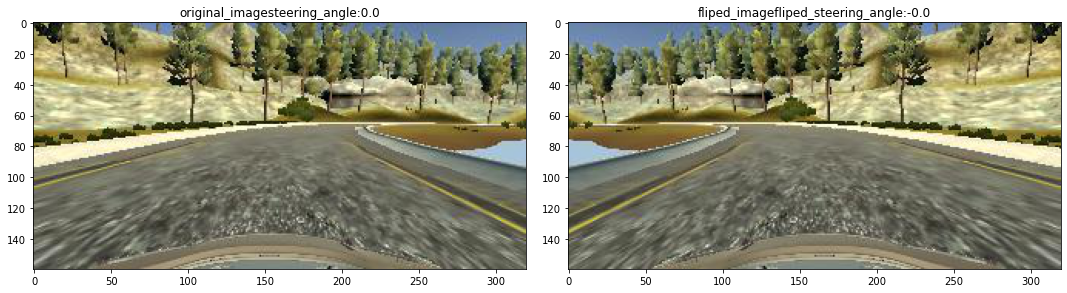

In [63]:
random_index = random.randint(0,1000)
image = image_path[random_index]
steering_angle = steering[random_index]



original_image = mpimg.imread(image)
fliped_image, fliped_steering_angle = flip(original_image,steering_angle)

fig,ax =plt.subplots(1,2, figsize=(15,20))
fig.tight_layout()

ax[0].imshow(original_image)
ax[0].set_title('original_image'+'steering_angle:' + str(steering_angle))
ax[1].imshow(fliped_image)
ax[1].set_title('fliped_image'+'fliped_steering_angle:' + str(fliped_steering_angle))

In [78]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    
    if np.random.rand() <0.5:
        image = pan(image)
    if np.random.rand() <0.5:
        image = zoomed(image)
    if np.random.rand() <0.5:
        image = img_random_brightness(image)
    if np.random.rand() <0.5:
        image, steering_angle = flip(image, steering_angle)
    return image,steering_angle
        

In [80]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img = img/255
 
    return img

In [ ]:
ncol = 2
nrow = 10
 
fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()
 
for i in range(10):
    
    randnum = random.randint(0, len(image_paths) - 1)
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = mpimg.imread(random_image)
    augmented_image, steering = random_augment(random_image, random_steering)
    
    axs[i][0].imshow(original_image)
    axs[i][0].set_title("Original Image")
  
    axs[i][1].imshow(augmented_image)
    axs[i][1].set_title("Augmented Image")

Text(0.5, 1.0, 'prepocessing_img')

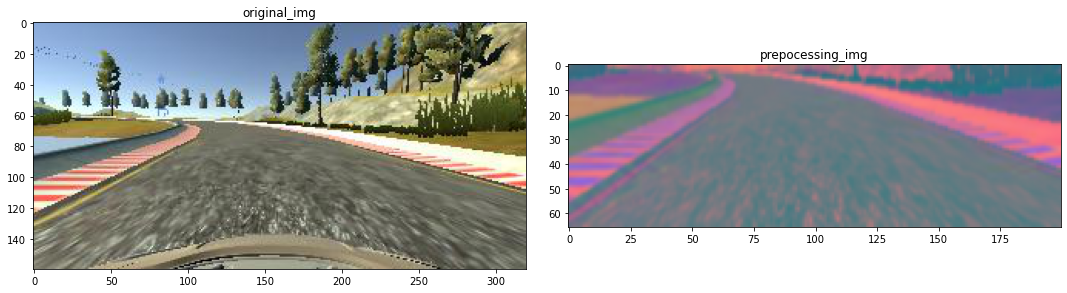

In [81]:
image = image_path[100]
original_img = mpimg.imread(image)
prepocessing_img = img_preprocess(image)

fig,axs = plt.subplots(1,2,figsize = (15,10))
fig.tight_layout()

axs[0].imshow(original_img)
axs[0].set_title("original_img")
axs[1].imshow(prepocessing_img)
axs[1].set_title("prepocessing_img")

In [83]:
def batch_generator(image_path, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_path) - 1)
      
      if istraining:
        im, steerings = random_augment(image_path[random_index], steering_ang[random_index])
     
      else:
        im = mpimg.imread(image_path[random_index])
        steering = steering_ang[random_index]
      
      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steerings)
    yield (np.asarray(batch_img), np.asarray(batch_steering)) 

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))


In [58]:
X_train = np.array(list(map(img_preprocess,X_train)))
X_valid = np.array(list(map(img_preprocess,X_valid)))


(1096, 66, 200, 3)


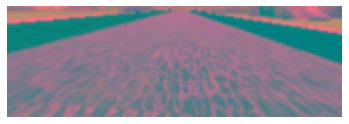

In [59]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [60]:
def nvidia_model():
    model = Sequential()
    model.add(Convolution2D(24, 5, 5, subsample  = (2,2), input_shape = (66,200,3), activation = 'elu'))
    model.add(Convolution2D(36, 5, 5, subsample  = (2,2) , activation = 'elu'))
    model.add(Convolution2D(48, 5, 5, subsample  = (2,2) , activation = 'elu'))
    model.add(Convolution2D(64, 3, 3, activation = 'elu'))
    model.add(Convolution2D(64, 3, 3, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation = 'elu'))
    model.add(Dropout(0.5))  
    
    model.add(Dense(50, activation = 'elu'))
    model.add(Dropout(0.5))  
    
    model.add(Dense(10, activation = 'elu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    optimizer = Adam(lr = 1e-3)
    model.compile(loss  = 'mse', optimizer = optimizer)
    return model



In [61]:
model = nvidia_model()
print(model.summary())


C:\Users\salaj\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\salaj\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
C:\Users\salaj\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
C:\Users\salaj\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
C:\Users\salaj\Anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:7: Us

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)            

In [62]:
history = model.fit(X_train, y_train , epochs = 30, validation_data = (X_valid,y_valid) , batch_size = 100, verbose = 1, shuffle = 1)

Train on 1096 samples, validate on 274 samples
Epoch 1/30
1096/1096 [==============================] - 5s 4ms/step - loss: 1.8121 - val_loss: 0.0872
Epoch 2/30
1096/1096 [==============================] - 1s 1ms/step - loss: 0.3979 - val_loss: 0.0807
Epoch 3/30
1096/1096 [==============================] - 1s 635us/step - loss: 0.1950 - val_loss: 0.0963
Epoch 4/30
1096/1096 [==============================] - 1s 650us/step - loss: 0.1714 - val_loss: 0.0803
Epoch 5/30
1096/1096 [==============================] - 1s 629us/step - loss: 0.1606 - val_loss: 0.0817
Epoch 6/30
1096/1096 [==============================] - 1s 622us/step - loss: 0.1395 - val_loss: 0.0842
Epoch 7/30
1096/1096 [==============================] - 1s 634us/step - loss: 0.1264 - val_loss: 0.0810
Epoch 8/30
1096/1096 [==============================] - 1s 644us/step - loss: 0.1169 - val_loss: 0.0781
Epoch 9/30
1096/1096 [==============================] - 1s 629us/step - loss: 0.1126 - val_loss: 0.0770
Epoch 10/30
1096/1096

Text(0.5, 0, 'Epoch')

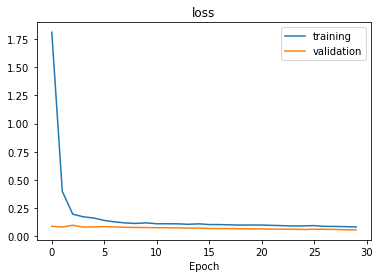

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('Epoch')

In [64]:
model.save('model.h5')